In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sahajb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sahajb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
train = pd.read_csv("train.tsv", delimiter = '\t')
test  = pd.read_csv("train.tsv", delimiter = '\t')

In [20]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [21]:
Sentiment_words=[]
for row in train['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('neutral')
    elif row == 2:
        Sentiment_words.append('somewhat negative')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train['Sentiment_words'] = Sentiment_words

In [22]:
word_count=pd.value_counts(train['Sentiment_words'].values, sort=False)
word_count

neutral              27273
somewhat negative    79582
positive              9206
negative              7072
somewhat positive    32927
dtype: int64

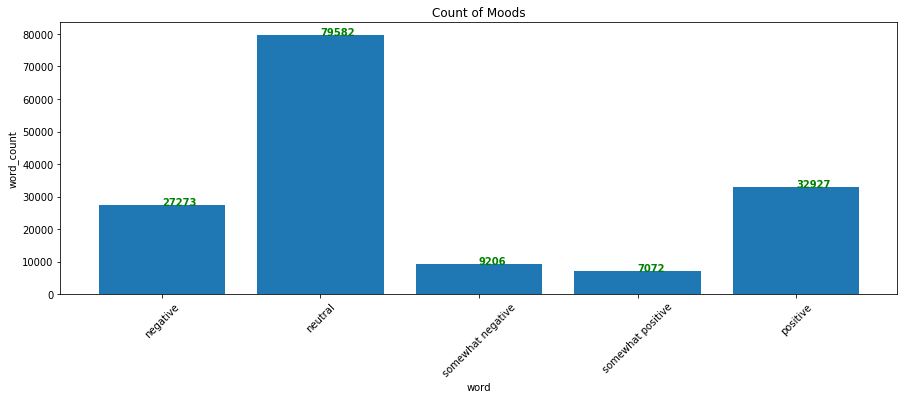

In [23]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','neutral','somewhat negative','somewhat positive','positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

In [26]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [31]:
corpus = []
for i in range(0, 156060):
    corpus.append(review_to_words(train['Phrase'][i]))

In [32]:
corpus1 = corpus
# for i in range(0, 156060):
#     corpus1.append(review_to_words(train['Phrase'][i]))

In [33]:
train['new_Phrase'] = corpus
train.drop(['Phrase'],axis=1,inplace=True)

In [34]:
positive = train[train['Sentiment_words']==('positive')]

In [35]:
words = ' '.join(positive['new_Phrase'])
split_word = " ".join([word for word in words.split()])

In [36]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

In [37]:
pos = positive['new_Phrase']

In [38]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)

In [39]:
pos_words = vectorizer.fit_transform(pos)
pos_words = pos_words.toarray()
pos = vectorizer.get_feature_names()

In [40]:
dist = np.sum(pos_words, axis=0)

In [41]:
postive_new= pd.DataFrame(dist)
postive_new.columns=['word_count']
postive_new['word'] = pd.Series(pos, index=postive_new.index)
postive_new1=postive_new[['word','word_count']]

In [42]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x_train = cv.fit_transform(corpus).toarray()
x_test= cv.fit_transform(corpus1).toarray()
y = train.iloc[:, 2].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.40, random_state = 0)


from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x_test)

In [46]:
print('hello')
from sklearn import metrics
print('Accuracy of Naive Bayes:', metrics.accuracy_score(y_test, y_pred))

hello
Accuracy of Naive Bayes: 0.5818435217224145


In [48]:
clf = LogisticRegression(C = 1)
clf.fit(X_train, y_train)
pred2 = clf.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [49]:
print('Accuracy of Logistic Regression: ', clf.score( X_train , y_train))

Accuracy of Logistic Regression:  0.6083450809517706


In [50]:
svm = LinearSVC(dual = False)
svm.fit(X_train, y_train)
pred4 = svm.predict(x_test)

In [51]:
print('Accuracy of SVM: ', svm.score( X_train , y_train))

Accuracy of SVM:  0.6041693365799479


In [52]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
pred6 = etc.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
print('Accuracy of ExtraTreesClassifier: ', etc.score( X_train , y_train))

Accuracy of ExtraTreesClassifier:  0.7784185569652697
